# Plotting in 2D

Author: Mike Wood

Learning Objective: By the end of this notebook, you should be able to visualize 2D data using a variety of different plotting approaches

#### Import the libraries for this notebook

In [1]:
# import the numpy, matplotlib, and netCDF4 libraries
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

In this example, we will use global bathymetry as an example dataset for plotting. The `netCDF4` library provides us with a convenient way to read in data from netCDF files using the `Dataset` function. To get started, let's read in the data:

In [2]:
# define the file name
file_name = 'global_bathymetry.nc'

# open the nc file
ds = nc4.Dataset(file_name)

# read in the variables as numpy arrays
lon = ds.variables['longitude'][:]
lat = ds.variables['latitude'][:]
bathy = ds.variables['Depth'][:, :]

# close the dataset
ds.close()

## Plotting in 2D
There are at least 3 options for plotting flat 2D data: `contourf`, `pcolormesh`, and `imshow`.  Let's take a look at these approaches.

### Using `contourf`

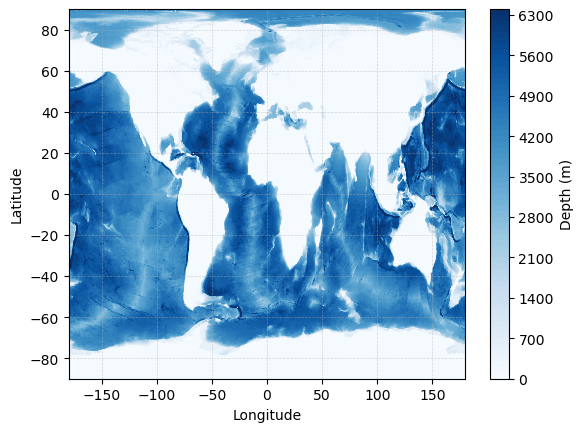

In [3]:
# make a new figure object
fig = plt.figure()

# plot the data - levels can be a number or a range
# C = plt.contourf(lon, lat, bathy, levels=100, cmap='Blues')
C = plt.contourf(lon, lat, bathy,
                 levels=np.arange(0,6500,100), cmap='Blues')

# add a colorbar
cbar = plt.colorbar(C)

# add labels to the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# add a label to the colorbar
cbar.set_label('Depth (m)')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# show the plot
plt.show()

When using the `contourf` function, the `level` flag can be used to provide the number of levels (e.g. 100) or an array describing the list of levels to plot.

### Using `pcolormesh`

An alternative to a contour plot is a color mesh - in this case, the plot will show the data on the actual grid rather than intepolating between levels to find regions of similar values.

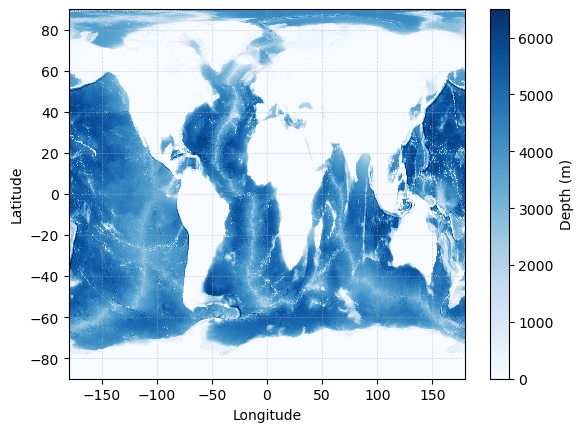

In [4]:
# make a new figure object
fig = plt.figure()

# plot the data
C = plt.pcolormesh(lon, lat, bathy, cmap='Blues',
                  vmin=0,vmax=6500)

# add a colorbar
cbar = plt.colorbar(C)

# add labels to the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# add a label to the colorbar
cbar.set_label('Depth (m)')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# show the plot
plt.show()

### Using `imshow`

Finally, `imshow` is another option for showing 2D data. When using this command, we need to pass in the extents of the "image" and the orientation.

Be default, `imshow` will orient the `y`-axis to increase downwards on the page. If you'd like to reverse this behavior, you can set the flag `origin='lower'`

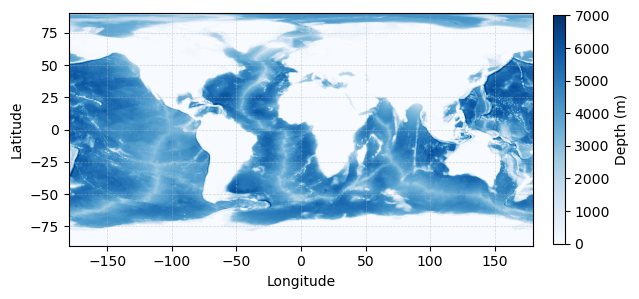

In [5]:
# make a new figure object
fig = plt.figure()

# plot the data 
C = plt.imshow(bathy, origin='lower', cmap='Blues',
               extent = [np.min(lon), np.max(lon), np.min(lat), np.max(lat)])

# add a colorbar
cbar = plt.colorbar(C, fraction=0.023, pad=0.04)

# add labels to the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# add a label to the colorbar
cbar.set_label('Depth (m)')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# show the plot
plt.show()

Note that `imshow` will also resize the plotting area to be consistent with the relative extent of the image. You can resize your colorbar to match your image shape using the `fraction` flag, as shown above.

## Choosing a Colormap

When plotting 2D data, Python provides a variety of colormaps to choose from. See the page [HERE](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for a list of options.